In [413]:
# import libraries

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [414]:
# read the training data set
train = pd.read_csv('train.csv')
# read the test data
test = pd.read_csv('test.csv')

In [415]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [416]:
# Combine Train and Test data 
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,ind,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,NaN


In [417]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
ind                             0
Item_Outlet_Sales            5681
dtype: int64

<h2> Tagret Variable </h2>

Item_Outlet_Sales is a right skewed variable and needs some data transformation to it its skewness


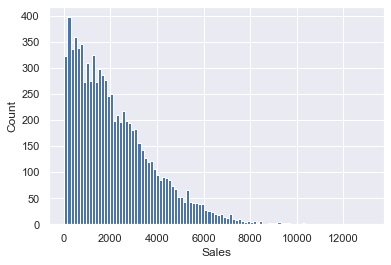

In [418]:
plt.hist(train.Item_Outlet_Sales, density=False, bins = 100)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Sales')

print("Item_Outlet_Sales is a right skewed variable and needs some data transformation to it its skewness")

<h2>Numeric Variables</h2>

/Users/ola/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ola/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


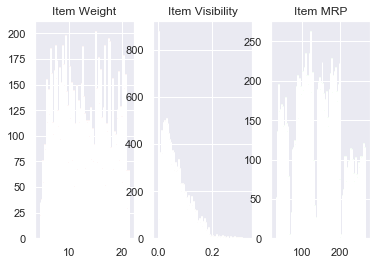

No pattern in Item wieght. 
Item Visibility is right-skewed. 
Item MRP seems to have 4 different distributions.


In [419]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes.flatten()

colors = ['red', 'tan', 'lime']

ax0.hist(df.Item_Weight, bins = 100, density=False, histtype='bar', color=colors[0])
ax0.set_title('Item Weight')

ax1.hist(df.Item_Visibility, bins = 100, density=False, histtype='bar', color=colors[1])
ax1.set_title('Item Visibility')

ax2.hist(df.Item_MRP, bins = 100, density=False, histtype='bar', color=colors[2])
ax2.set_title('Item MRP')


plt.show()

print("No pattern in Item wieght. \nItem Visibility is right-skewed. \nItem MRP seems to have 4 different distributions.")

<h2>Categorical Variables</h2>

Low Fat, LF and low fat can be combined in one category. Similarly Regular and reg can be combined.


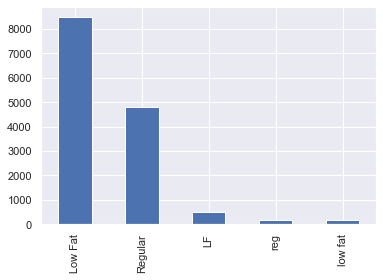

In [420]:
df['Item_Fat_Content'].value_counts().plot(kind='bar')

print("Low Fat, LF and low fat can be combined in one category. Similarly Regular and reg can be combined.")

In [421]:
# Cleaning Item Fat Content Variable
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({"Low Fat": "Low Fat", "LF": "Low Fat", "low fat": "Low Fat", "Regular": "Regular", "reg": "Regular"})

1 = Low Fat 
2 = Regular


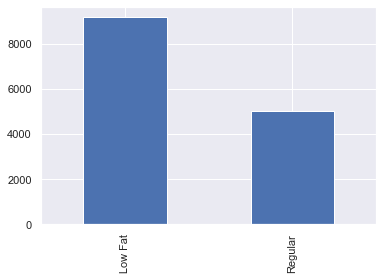

In [422]:
df['Item_Fat_Content'].value_counts().plot(kind='bar')
print("1 = Low Fat \n2 = Regular")

Item Type


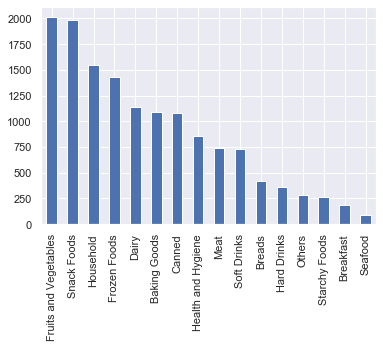

In [423]:
print("Item Type")
df['Item_Type'].value_counts().plot(kind='bar');

Outlet Identifier


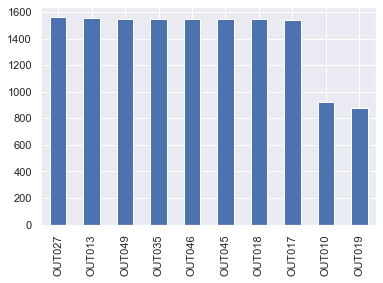

In [424]:
print("Outlet Identifier")
df['Outlet_Identifier'].value_counts().plot(kind='bar');

Outlet Size


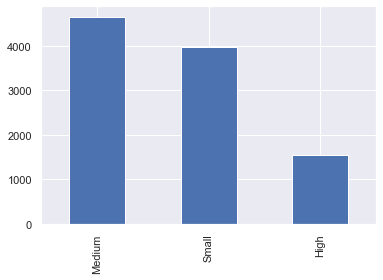

In [425]:
print("Outlet Size")
df['Outlet_Size'].value_counts().plot(kind='bar');

Outlet Establishment Year


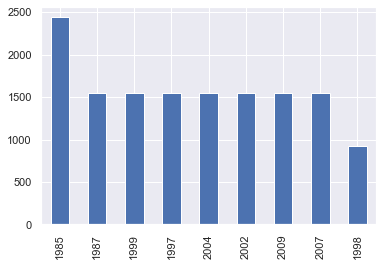

In [426]:
print("Outlet Establishment Year")
df['Outlet_Establishment_Year'].value_counts().plot(kind='bar');

Outlet Type


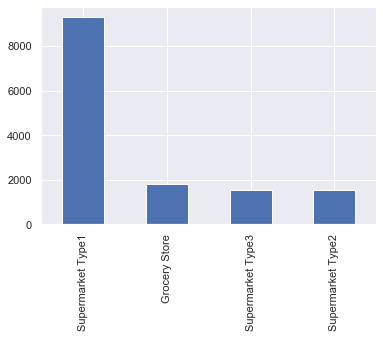

In [427]:
print("Outlet Type")
df['Outlet_Type'].value_counts().plot(kind='bar');

<h2>Traget Variable vs Numerical Variables</h2>

Item Weight vs Item Outlet Sales


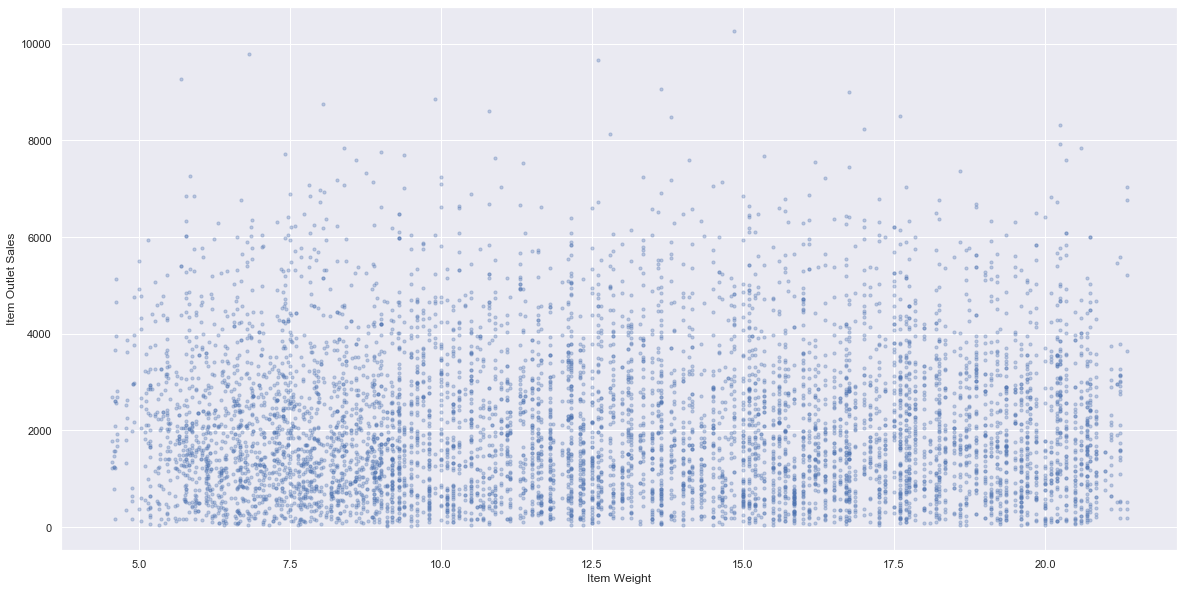

Item Outlet Sales is spread across entire range of Weight - no pattern


In [428]:
print("Item Weight vs Item Outlet Sales")
plt.figure(figsize=(20,10))
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'], alpha = 0.3, s=10);
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()
print("Item Outlet Sales is spread across entire range of Weight - no pattern")

Item Visibility vs Item Outlet Sales


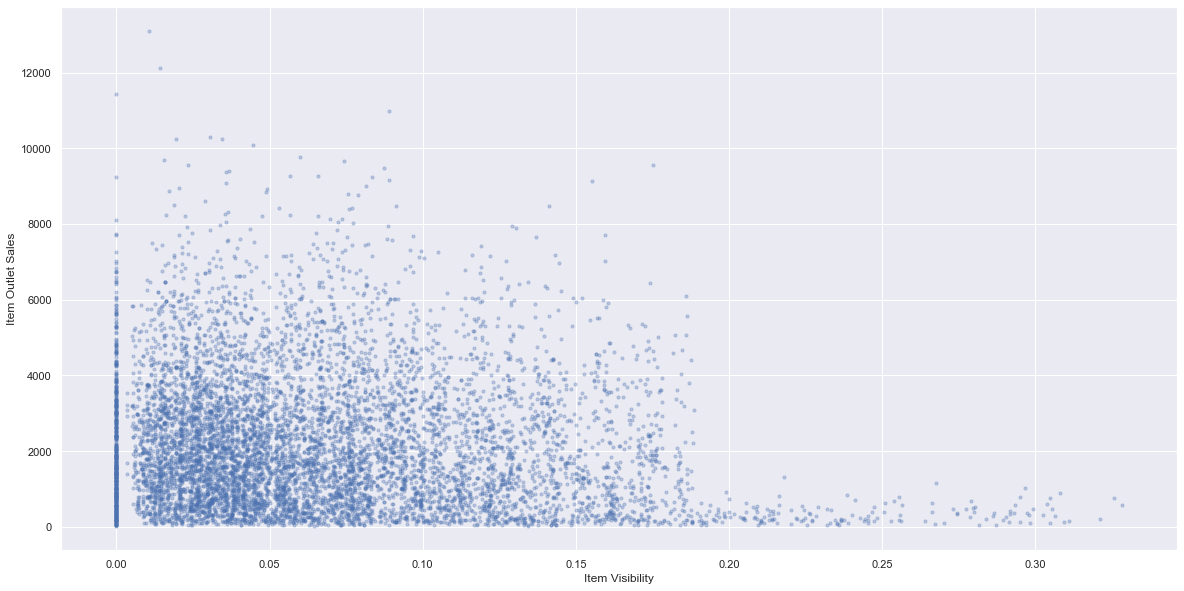

Line of points at Item Visibility = 0 - strange as visibility cannot be 0


In [429]:
print("Item Visibility vs Item Outlet Sales")
plt.figure(figsize=(20,10))
plt.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'], alpha = 0.3, s=10);
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()
print("Line of points at Item Visibility = 0 - strange as visibility cannot be 0")

Item MRP vs Item Outlet Sales


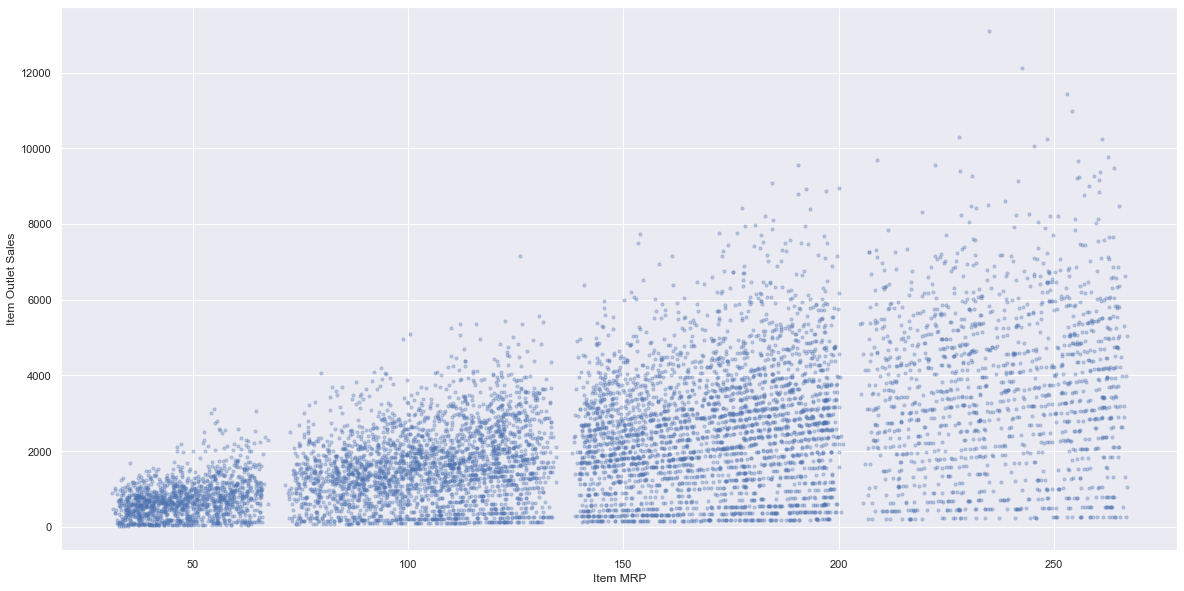

There are clearly 4 segements of prices


In [430]:
print("Item MRP vs Item Outlet Sales")
plt.figure(figsize=(20,10))
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'], alpha = 0.3, s=10);
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()
print("There are clearly 4 segements of prices")

<h2>Traget Variable vs Categorical Variables</h2>

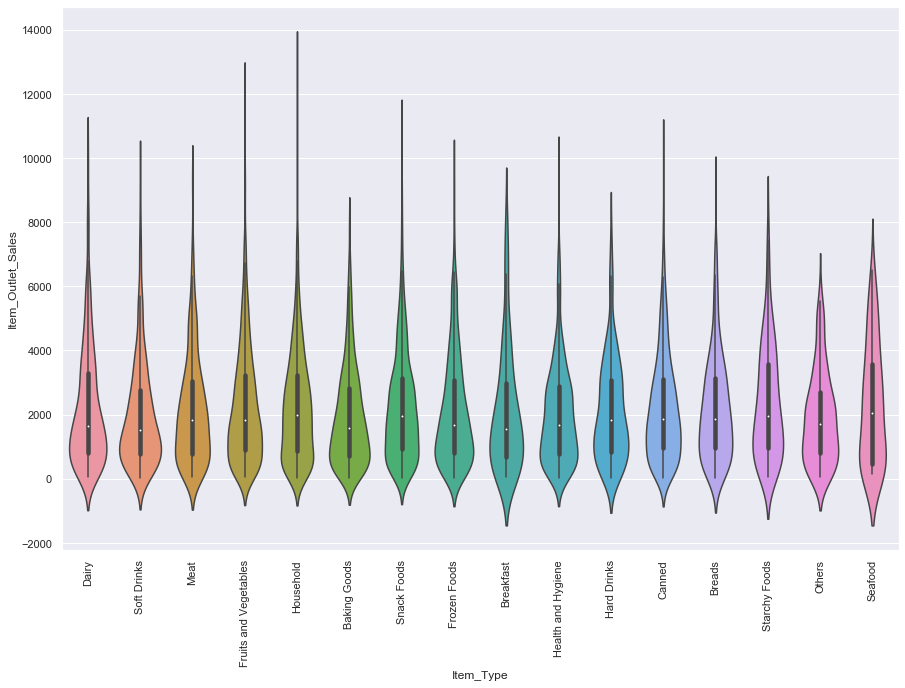

In [431]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="Item_Type", y="Item_Outlet_Sales", data=train);
plt.xticks(rotation=90);

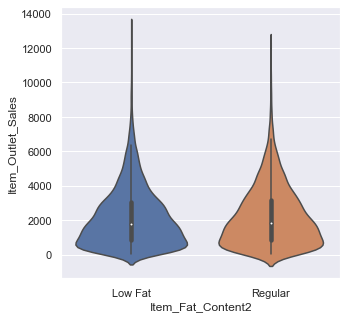

In [432]:
train['Item_Fat_Content2'] = train['Item_Fat_Content'].map({"Low Fat": 'Low Fat', "LF": 'Low Fat', "low fat": 'Low Fat', "Regular": 'Regular', "reg": 'Regular'})

sns.set(rc={'figure.figsize':(5,5)})
sns.violinplot(x="Item_Fat_Content2", y="Item_Outlet_Sales", data=train);


The distribution of OUT010 and OUT019 is similar to each other and different to the rest of the identifiers.


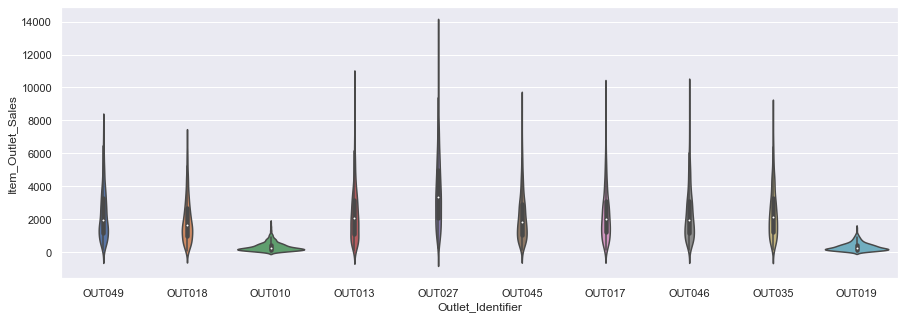

In [433]:
sns.set(rc={'figure.figsize':(15,5)})
sns.violinplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=train);

print("The distribution of OUT010 and OUT019 is similar to each other and different to the rest of the identifiers.")

The distribution of missing values is almost identical to Small. Hence we should impute missing values with 'Small'.


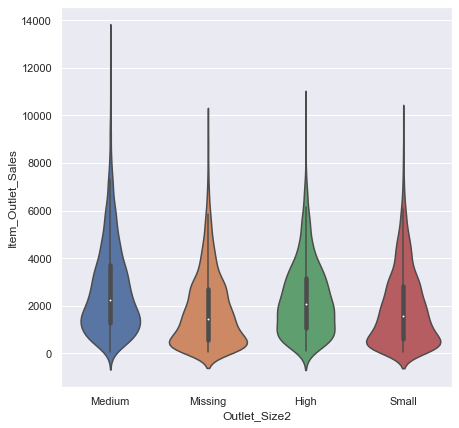

In [434]:
train['Outlet_Size2'] = train['Outlet_Size'].fillna('Missing')

sns.set(rc={'figure.figsize':(7,7)})
sns.violinplot(x="Outlet_Size2", y="Item_Outlet_Sales", data=train);

print("The distribution of missing values is almost identical to Small. Hence we should impute missing values with 'Small'.")

Tier 1 and Tier 3 distributions look similar.


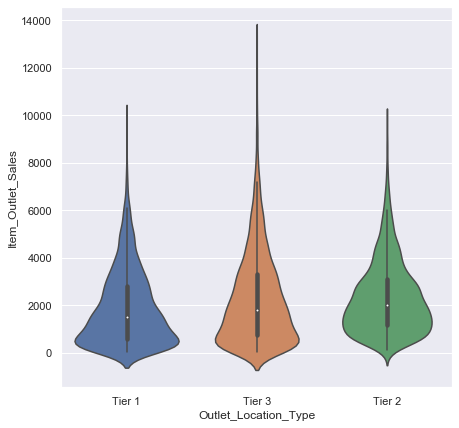

In [435]:
sns.set(rc={'figure.figsize':(7,7)})
sns.violinplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=train);

print("Tier 1 and Tier 3 distributions look similar.")

Grocery Store has very different distribution to the rest types. 
It has most of the data points around lower values of the sales comparing to other types.


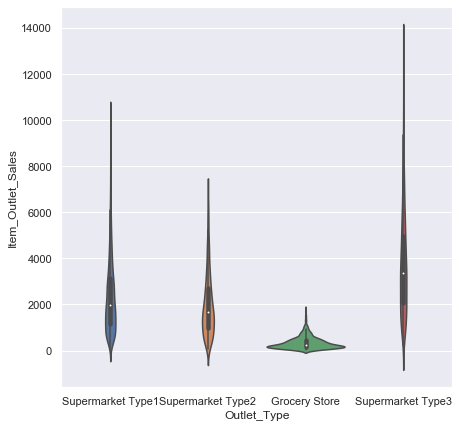

In [436]:
sns.set(rc={'figure.figsize':(7,7)})
sns.violinplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train);

print("Grocery Store has very different distribution to the rest types. \nIt has most of the data points around lower values of the sales comparing to other types.")

<h2>Imputing Missing Value</h2>

In [437]:
# Impute item weight with mean weight based on the item identifier 
df["Item_Weight"] = df.groupby("Item_Identifier").transform(lambda x: x.fillna(x.mean()))
df.Item_Weight.isna().sum()

0

In [438]:
# Replace 0 in item visibility mean visibility based on the item identifier 
df['Item_Visibility'] = df['Item_Visibility'].replace(0, np.nan)
df['Item_Visibility'] = df['Item_Visibility'].fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

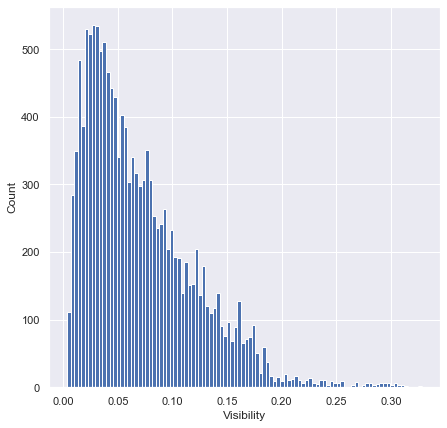

In [439]:
plt.hist(df.Item_Visibility, density=False, bins = 100);  # density=False would make counts
plt.ylabel('Count');
plt.xlabel('Visibility');

In [440]:
# Impute item weight with mean weight based on the item identifier 
df["Outlet_Size"] = df["Outlet_Size"].fillna('Small')
df["Outlet_Size"].isna().sum()

0

<h2>Feature Engineering</h2>

In [441]:
# Create broader categories for Item Type
perishable = ['Fruits and Vegetables', 'Dairy', 'Meat', 'Breads', 'Breakfast', 'Seafood']
non_perishable = ['Snack Foods', 'Frozen Foods', 'Baking Goods', 'Canned', 
                  'Soft Drinks', 'Hard Drinks', 'Starchy Foods']
not_food = ['Health and Hygiene', 'Household','Others']

df['New_Item_Type'] = df['Item_Type'].map( {'Fruits and Vegetables' : 'perishable', 
                                            'Dairy' : 'perishable', 
                                            'Meat' : 'perishable', 
                                            'Breads' : 'perishable', 
                                            'Breakfast' : 'perishable', 
                                            'Seafood' : 'perishable', 
                                            'Snack Foods' : 'non_perishable', 
                                            'Frozen Foods' : 'non_perishable', 
                                            'Baking Goods' : 'non_perishable', 
                                            'Canned' : 'non_perishable', 
                                            'Soft Drinks' : 'non_perishable', 
                                            'Hard Drinks' : 'non_perishable', 
                                            'Starchy Foods' : 'non_perishable', 
                                            'Health and Hygiene' : 'not_food', 
                                            'Household' : 'not_food',
                                            'Others' : 'not_food'} )

df['New_Item_Type'].value_counts()

non_perishable    6942
perishable        4576
not_food          2686
Name: New_Item_Type, dtype: int64

In [442]:
# Create category of Item Types based on Item Identifier: FD-food, DR-drink, NC-non-consumable
df['Item_Category'] = df['Item_Identifier'].str[:2]

df[["Item_Type", "Item_Category"]].groupby(["Item_Type", "Item_Category"]).size()


Item_Type              Item_Category
Baking Goods           FD               1086
Breads                 FD                416
Breakfast              FD                186
Canned                 FD               1084
Dairy                  DR                229
                       FD                907
Frozen Foods           FD               1426
Fruits and Vegetables  FD               2013
Hard Drinks            DR                362
Health and Hygiene     NC                858
Household              NC               1548
Meat                   FD                736
Others                 NC                280
Seafood                FD                 89
Snack Foods            FD               1989
Soft Drinks            DR                726
Starchy Foods          FD                269
dtype: int64

In [443]:
df['Item_Category'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Category, dtype: int64

In [444]:
# Remove fat content variable for non-consumable goods
df['Item_Fat_Content'] = np.where((df.Item_Category == 'NC'),'Non-Edible',df.Item_Fat_Content)
df[["Item_Category", "Item_Fat_Content"]].groupby(["Item_Category", "Item_Fat_Content"]).size()

Item_Category  Item_Fat_Content
DR             Low Fat             1208
               Regular              109
FD             Low Fat             5291
               Regular             4910
NC             Non-Edible          2686
dtype: int64

In [445]:
# Create feature Years of Operation
df['Years_Operating'] = 2020 - df['Outlet_Establishment_Year']

In [446]:
# Create feature price per unit weight
df['Price_per_unit'] = df['Item_MRP']/df['Item_Weight']

In [447]:
# Create categorical feature based on item mrp distribution
df['Item_MRP_clusters'] = pd.cut(df.Item_MRP,bins=[0,69,136,206,300],labels=['1st','2nd','3rd','4th'])
df['Item_MRP_clusters'].value_counts()

3rd    4950
2nd    4661
4th    2385
1st    2208
Name: Item_MRP_clusters, dtype: int64

<h2>Encoding Categorical Variables</h2>

In [448]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,ind,Item_Outlet_Sales,New_Item_Type,Item_Category,Years_Operating,Price_per_unit,Item_MRP_clusters
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,NaN,non_perishable,FD,21,5.198178,2nd
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,test,NaN,perishable,FD,13,10.520458,2nd
2,NCN55,14.600,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,test,NaN,not_food,NC,22,16.558479,4th
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,test,NaN,non_perishable,FD,13,21.193985,3rd
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,NaN,perishable,FD,35,17.222794,4th


In [449]:
print("Use label encoding for Outlet_Size and Outlet_Location_Type and one hot encoding for other categorical variables")

Use label encoding for Outlet_Size and Outlet_Location_Type and one hot encoding for other categorical variables


In [450]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Outlet_Size'. 
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size']) 
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type']) 

In [451]:
# One hot encode the rest of the categorical variables

keep_columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 
                'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 
                'Outlet_Location_Type', 'Outlet_Type', 'ind', 'Item_Outlet_Sales', 
                'New_Item_Type', 'Item_Category', 'Years_Operating','Price_per_unit', 'Item_MRP_clusters']

df = pd.get_dummies(df[keep_columns], columns=['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Type', 
                                 'New_Item_Type', 'Item_Category', 'Item_MRP_clusters'])

<h2>Data PreProcessing</h2>

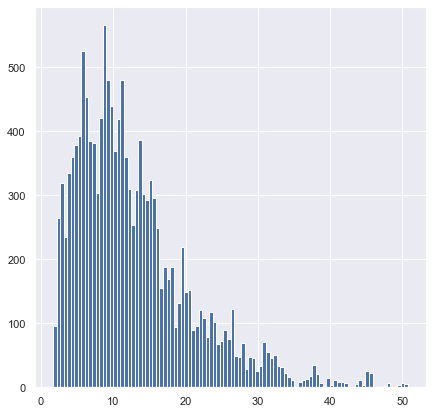

In [452]:
plt.hist(df.Price_per_unit, density=False, bins = 100) ;

In [453]:
# Remove skewness in item visibility and price per unit by taking log
df['Item_Visibility'] = np.log(df.Item_Visibility + 1)
df['Price_per_unit'] = np.log(df.Price_per_unit + 1)

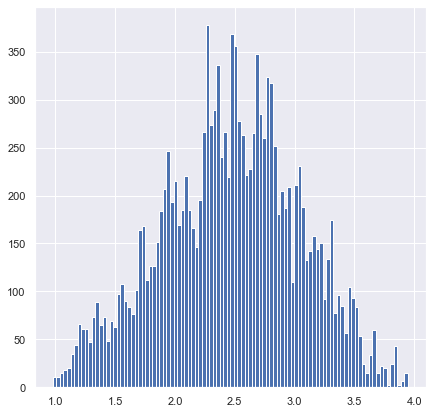

In [454]:
plt.hist(df.Price_per_unit, density=False, bins = 100) ;

In [455]:
# Standardize numeric columns

# define numeric columns
numeric = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 
           'Outlet_Size', 'Outlet_Location_Type', 'Years_Operating', 'Price_per_unit']
# transform data
df[numeric] = StandardScaler().fit_transform(df[numeric])

df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,ind,Item_Outlet_Sales,Years_Operating,Price_per_unit,...,New_Item_Type_non_perishable,New_Item_Type_not_food,New_Item_Type_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_MRP_clusters_1st,Item_MRP_clusters_2nd,Item_MRP_clusters_3rd,Item_MRP_clusters_4th
0,1.710530,-1.304285,-0.533831,0.139681,-0.664115,-1.369286,test,NaN,-0.139681,-1.104239,...,1,0,0,0,1,0,0,1,0,0
1,-0.965996,-0.642819,-0.864708,1.095319,0.799968,-0.138860,test,NaN,-1.095319,-0.032209,...,0,0,1,0,1,0,0,1,0,0
2,0.388391,0.611563,1.622763,0.020226,0.799968,1.091566,test,NaN,-0.020226,0.696601,...,0,1,0,0,0,1,0,0,0,1
3,-1.177753,-1.134709,0.225966,1.095319,0.799968,-0.138860,test,NaN,-1.095319,1.101783,...,1,0,0,0,1,0,0,0,1,0
4,0.173409,0.987633,1.501577,-1.532686,-0.664115,1.091566,test,NaN,1.532686,0.760826,...,0,0,1,0,1,0,0,0,0,1


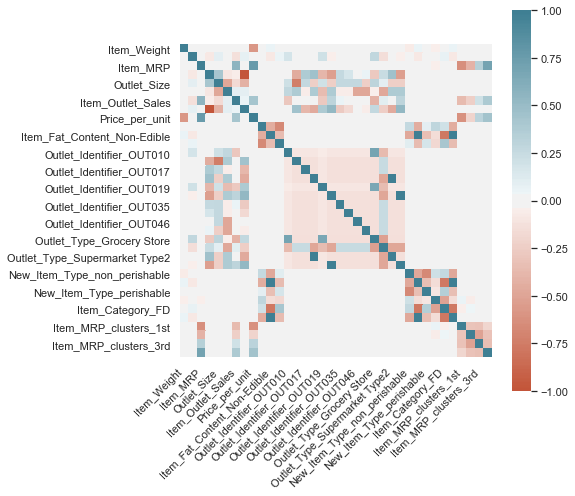

In [456]:
# Examine correlated features
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [459]:
# Split the combined df back into test and train 
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [460]:
test = test.drop(['ind', 'Item_Outlet_Sales'], axis = 1)
train = train.drop(['ind'], axis = 1)